In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [259]:
def draw_investment_clock(index, base, title, cpi, gdp,
                          country, start_date):
    index = index[country].loc[start_date:]
    # Using Exponential Moving Average to smooth out values
    index = index.ewm(com=1.5).mean().dropna()
        
    x = (index - base)[1:]
    xmax = x.abs().max()
    x = x * (10/xmax)
    
    y = index.diff().dropna()
    ymax = y.abs().max()
    y = y * (10/ymax)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    ax1.plot(index)
    ax1.set_title(title)
    plt.gcf().autofmt_xdate()

    ax2.annotate(index.index[0].strftime('%Y-%m'), 
                 xy=(x[0], y[0]), xytext=(x[0]+1, y[0]+1),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x[:25], y[:25])
    ax2.annotate(index.index[24].strftime('%Y-%m'), 
                 xy=(x[24], y[24]), xytext=(x[24]+3, y[24]+3),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x[24:-7], y[24:-7])
    ax2.annotate(index.index[-8].strftime('%Y-%m'), 
                 xy=(x[-8], y[-8]), xytext=(x[-7]-5, y[-7]-5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x[-8:], y[-8:])
    ax2.annotate(index.index[-1].strftime('%Y-%m'), 
                 xy=(x[-1], y[-1]), xytext=(x[-1]-7, y[-1]+5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.set_title('Investment Clock')
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(-15, 15)
    ax2.axhline(y=0, color='gray')
    ax2.axvline(x=0, color='gray')
    ax2.text(-14, 14, 'Recovery')
    ax2.text(9, 14, 'Overheat')
    ax2.text(8, -14, 'Stagflation')
    ax2.text(-14, -14, 'Reflation')

    ax3.plot(cpi[country].loc[start_date:], label='CPI')
    ax3.plot(gdp[country].loc[start_date:], label='GDP')
    ax3.set_title('CPI & GDP')
    ax3.legend(loc="upper right")


    plt.show()

In [260]:
cpi = pd.read_csv('Data\OECD_Stats\OECD_KEI_CPALTT01.csv', parse_dates=True, index_col=0)
gdp = pd.read_csv('Data\OECD_Stats\OECD_QNA_B1_GE.csv', parse_dates=True, index_col=0)

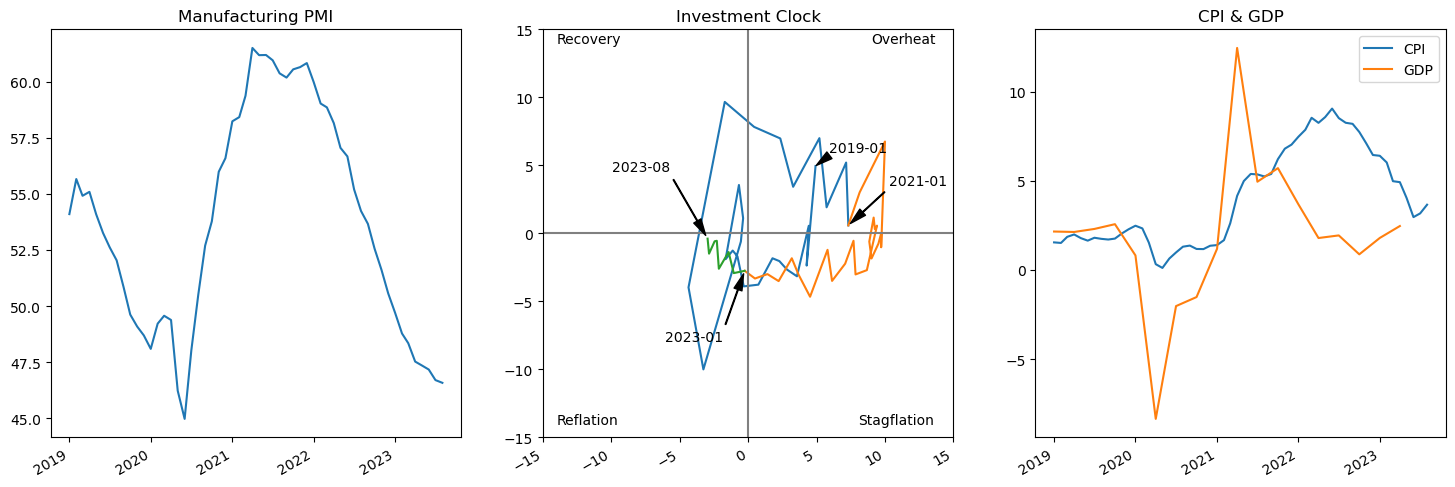

In [261]:
pmi = pd.read_csv('Data\Investing_PMI\PMI_2012-08-2022.csv', parse_dates=True, index_col=0)
draw_investment_clock(pmi, base=50, title='Manufacturing PMI', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

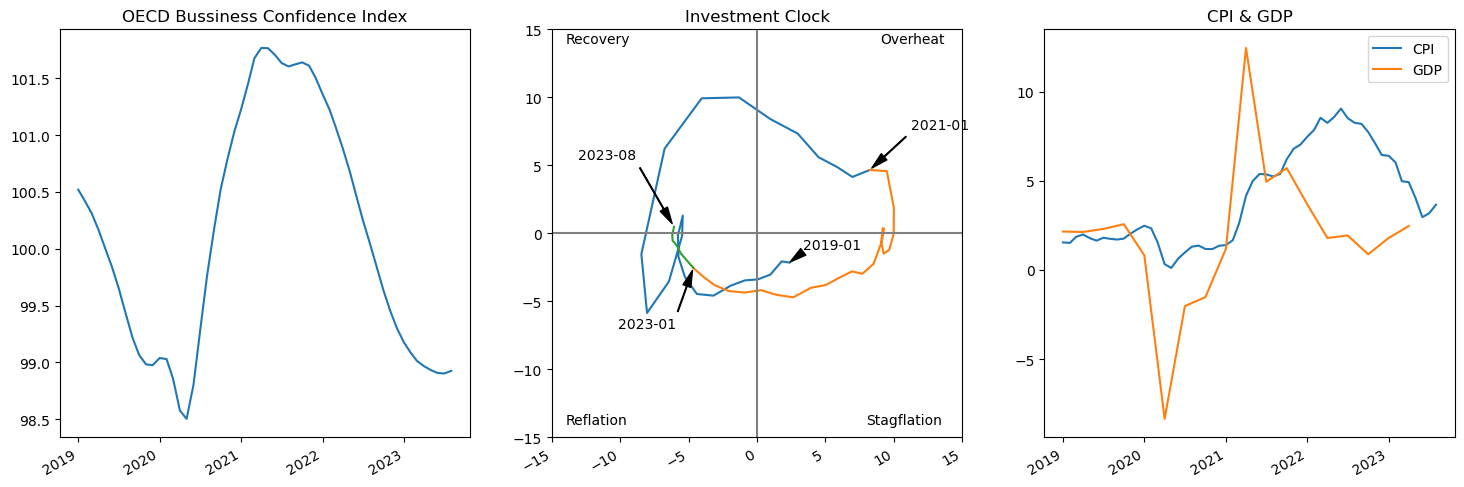

In [262]:
bci = pd.read_csv('Data\OECD_Stats\OECD_MEI_CLI_BSCICP03.csv', parse_dates=True, index_col=0)
draw_investment_clock(bci, base=100, title='OECD Bussiness Confidence Index', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

<img src="./InvestmentClock_byMerrillLyinch.png"  alt="drawing" width="600"/>

In [263]:
pmi['United States'].corr(bci['United States'])

0.9333343966727753

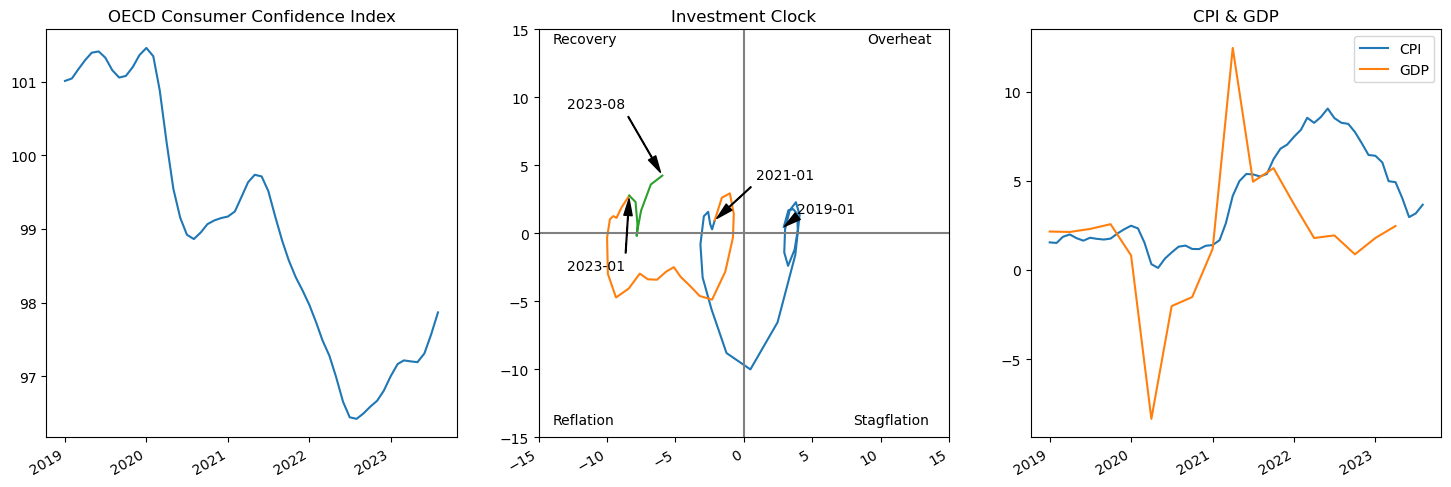

In [264]:
cci = pd.read_csv('Data\OECD_Stats\OECD_MEI_CLI_CSCICP03.csv', parse_dates=True, index_col=0)
draw_investment_clock(cci, base=100, title='OECD Consumer Confidence Index', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

In [265]:
pmi['United States'].corr(cci['United States'])

0.1827533923786057

In [266]:
cpi['United States'].corr(cci['United States'])

-0.3106873191385285